<a href="https://colab.research.google.com/github/jaewoong-87/machine-learning/blob/main/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN - non parametic model

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_breast_cancer
from sklearn.datasets import fetch_california_housing, load_boston
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

knn seperation 이웃 분류

iris data

In [ ]:
iris = load_iris()

In [ ]:
iris_df =pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("evaluate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.9662162162162162
evaluate data score:1.0


In [ ]:
model= KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("evaluate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.33783783783783783
evaluate data score:0.0


In [ ]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([0.00149155, 0.00094962, 0.00091624, 0.00103736, 0.00075173]),
 'score_time': array([0.00424242, 0.00227308, 0.00348926, 0.00291967, 0.00289822]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights': ['uniform','distance'],
               'algorithm':['ball_tree','kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
print("GS best score:{}".format(gs.best_score_))

GS best score:0.9800000000000001


In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)
  out = plt.contourf(xx,yy, Z, **params)
  return out

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-14.242702,17.519438,0
1,-13.578282,20.242508,0
2,-14.683719,20.045244,0
3,-14.333879,20.497618,0
4,-13.853064,17.440681,0
...,...,...,...
145,2.522882,-12.536713,2
146,4.737744,-10.284327,2
147,3.124155,-11.879514,2
148,1.636926,-12.783695,2


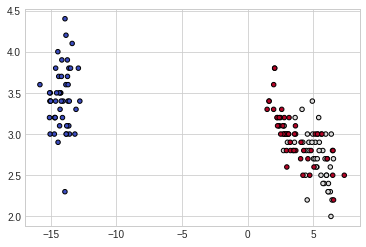

In [ ]:
plt.scatter(X_comp[:,0],X[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


In [ ]:
model =  KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

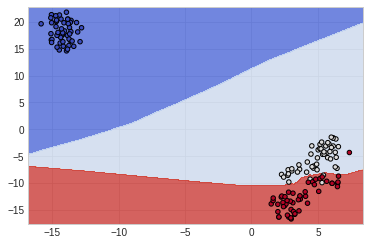

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1]) 
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

breast cancer data

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,0.7661,0.7800,4.115,92.81,0.008482,0.050570,0.06800,0.019710,0.01467,0.007259,25.28,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970,0
1,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,0.4222,0.8092,3.330,28.84,0.005541,0.033870,0.04505,0.014710,0.03102,0.004831,12.12,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018,1
2,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.07125,0.1844,0.9429,1.429,12.07,0.005954,0.034710,0.05028,0.008510,0.01750,0.004031,10.75,23.07,71.25,353.6,0.12330,0.34160,0.43410,0.08120,0.2982,0.09825,1
3,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.3530,1.735,20.20,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,1
4,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,0.4953,1.1990,2.765,63.33,0.005033,0.031790,0.04755,0.010430,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,10.800,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.01099,0.005344,0.01254,0.002120,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699,1
451,15.050,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,0.3860,1.1980,2.630,38.49,0.004952,0.016300,0.02967,0.009423,0.01152,0.001718,17.58,28.06,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954,0
452,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,0.2152,0.8301,1.215,12.64,0.011640,0.010400,0.01186,0.009623,0.02383,0.003540,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178,1
453,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,0.3892,1.0460,2.644,32.74,0.007976,0.012950,0.01608,0.009046,0.02005,0.002830,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,1


In [ ]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("evaluate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.9428571428571428
evaluate data score:0.9385964912280702


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("evaluate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.3758241758241758
evaluate data score:0.35964912280701755


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [ ]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00580859, 0.00191426, 0.00177097, 0.00184417, 0.00188518]),
 'score_time': array([0.00849199, 0.00976348, 0.00865293, 0.00801635, 0.00636101]),
 'test_score': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])}

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model',KNeighborsClassifier())]
)

In [ ]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights': ['uniform','distance'],
               'model__algorithm':['ball_tree','kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
      

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
print("GS best score:{}".format(gs.best_score_))

GS best score:0.9701288619779538


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,-30.151489,-2.554166,0
1,-31.160141,-5.266853,0
2,-26.642788,-7.397446,0
3,8.516910,12.578818,0
4,-26.523499,-9.853108,0
...,...,...,...
564,-32.891586,-5.195593,0
565,-27.840828,-7.523109,0
566,-10.162843,-15.986873,0
567,-29.030838,-6.098853,0


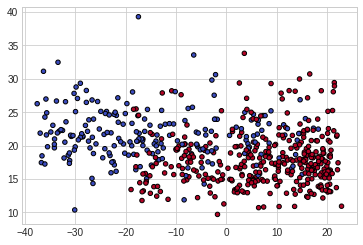

In [ ]:
plt.scatter(X_comp[:,0],X[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

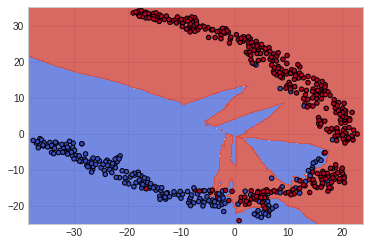

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1]) 
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

KNN regression boston housing price

In [ ]:
boston = load_boston()

In [ ]:
boston_df =pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['Target'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.15936,0.0,6.91,0.0,0.4480,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44,24.7
1,0.61470,0.0,6.20,0.0,0.5070,6.618,80.8,3.2721,8.0,307.0,17.4,396.90,7.60,30.1
2,5.29305,0.0,18.10,0.0,0.7000,6.051,82.5,2.1678,24.0,666.0,20.2,378.38,18.76,23.2
3,24.39380,0.0,18.10,0.0,0.7000,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5
4,20.08490,0.0,18.10,0.0,0.7000,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,11.10810,0.0,18.10,0.0,0.6680,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
400,0.13960,0.0,8.56,0.0,0.5200,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1
401,0.32264,0.0,21.89,0.0,0.6240,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90,17.4
402,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0


In [ ]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['Target'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
1,11.08740,0.0,18.10,0.0,0.718,6.411,100.0,1.8589,24.0,666.0,20.2,318.75,15.02,16.7
2,0.05561,70.0,2.24,0.0,0.400,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74,29.0
3,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
4,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
98,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16,43.5
99,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
100,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("evaluate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.7190603174596741
evaluate data score:0.38826590990063403


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train_scale, y_train)))
print("evaluate data score:{}".format(model.score(X_test_scale, y_test)))

learning data score:0.8466822930424112
evaluate data score:0.6036557566371517


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [ ]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.00335956, 0.00304341, 0.00214171, 0.00270939, 0.00206399]),
 'score_time': array([0.00533676, 0.00340366, 0.0027492 , 0.0031867 , 0.00230479]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model',KNeighborsRegressor())]
)

In [ ]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights': ['uniform','distance'],
               'model__algorithm':['ball_tree','kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=7, p=2,
                                     weights='distance'))],
         verbose=False)

In [ ]:
print("GS best score:{}".format(gs.best_score_))

GS best score:0.4973060611762845


In [ ]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,-8.759900,24.0
1,11.479210,21.6
2,12.234463,34.7
3,13.657113,33.4
4,13.805850,36.2
...,...,...
501,-1.399494,22.4
502,-0.758505,20.6
503,0.027934,23.9
504,-0.016379,22.0


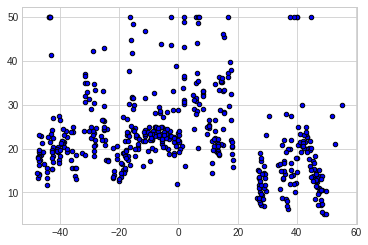

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

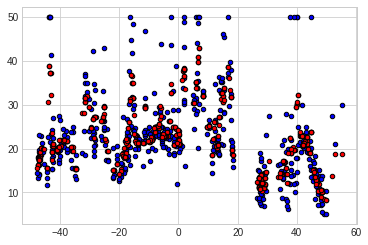

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

california

In [ ]:
california = fetch_california_housing()

In [ ]:
california_df =pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['Target'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,3.6484,16.0,3.456268,1.056851,1738.0,2.533528,33.61,-117.70,3.22600
1,9.3125,27.0,6.233083,0.857143,383.0,2.879699,33.90,-117.91,2.93500
2,2.0109,15.0,7.124542,1.963370,515.0,1.886447,33.40,-115.99,0.54300
3,4.5417,50.0,5.038462,0.989510,1159.0,4.052448,37.71,-122.45,2.33700
4,2.9571,18.0,4.968791,1.033810,2831.0,3.681404,33.77,-118.30,3.46200
...,...,...,...,...,...,...,...,...,...
16507,8.1189,52.0,8.154762,1.051587,735.0,2.916667,37.74,-122.47,5.00001
16508,3.6923,18.0,3.652038,1.043887,855.0,2.680251,37.59,-122.02,2.13200
16509,5.0865,36.0,6.086331,0.946043,778.0,2.798561,34.20,-118.31,3.49600
16510,3.5900,34.0,4.257732,1.054983,869.0,2.986254,33.87,-117.99,1.61900


In [ ]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['Target'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,1.6221,41.0,3.825607,1.086093,1776.0,3.920530,34.00,-118.26,1.042
1,6.2045,29.0,5.951923,1.043269,1217.0,2.925481,37.31,-122.04,3.938
2,3.6681,34.0,5.326761,0.909859,966.0,2.721127,36.79,-119.71,0.820
3,2.4408,32.0,4.457207,1.105856,954.0,2.148649,33.95,-117.40,1.173
4,3.0927,40.0,4.818182,1.012987,584.0,2.528139,33.98,-118.36,3.160
...,...,...,...,...,...,...,...,...,...
4123,3.0645,20.0,5.215789,1.087719,1996.0,3.501754,37.65,-121.02,1.060
4124,2.9821,45.0,4.481481,0.925926,67.0,2.481481,34.33,-118.68,3.250
4125,3.8000,41.0,4.773893,1.023310,1191.0,2.776224,33.91,-118.36,2.225
4126,2.3000,40.0,3.818841,0.909420,1056.0,3.826087,34.17,-118.14,1.467


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("evaluate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.4512521160459112
evaluate data score:0.16709351030765784


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("learning data score:{}".format(model.score(X_train_scale, y_train)))
print("evaluate data score:{}".format(model.score(X_test_scale, y_test)))

learning data score:0.7923535356574403
evaluate data score:0.6793625884624944


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [ ]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.6s finished


{'fit_time': array([0.04386306, 0.04428744, 0.04025698, 0.03683329, 0.03698945]),
 'score_time': array([0.60397434, 0.50756764, 0.52380371, 0.62822342, 0.41102409]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model',KNeighborsRegressor())]
)

In [ ]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights': ['uniform','distance'],
               'model__algorithm':['ball_tree','kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.7s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=7, p=2,
                                     weights='distance'))],
         verbose=False)

In [ ]:
print("GS best score:{}".format(gs.best_score_))

GS best score:0.5376515274379832


In [ ]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

KeyboardInterrupt: ignored

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,-8.759900,24.0
1,11.479210,21.6
2,12.234463,34.7
3,13.657113,33.4
4,13.805850,36.2
...,...,...
501,-1.399494,22.4
502,-0.758505,20.6
503,0.027934,23.9
504,-0.016379,22.0


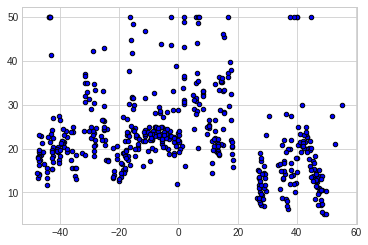

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

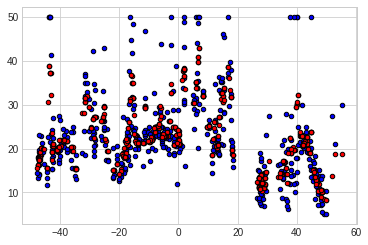

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');